# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
import numpy as np

# Set the random seed
seed = 42
np.random.seed(seed)

# Print the shapes of the training and test sets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Print the dimensions of the images
print("Image dimensions (pixels x pixels, color channels) :", x_train[0].shape)

# Print the number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Image dimensions (pixels x pixels, color channels) : (32, 32, 3)
Number of classes: 100


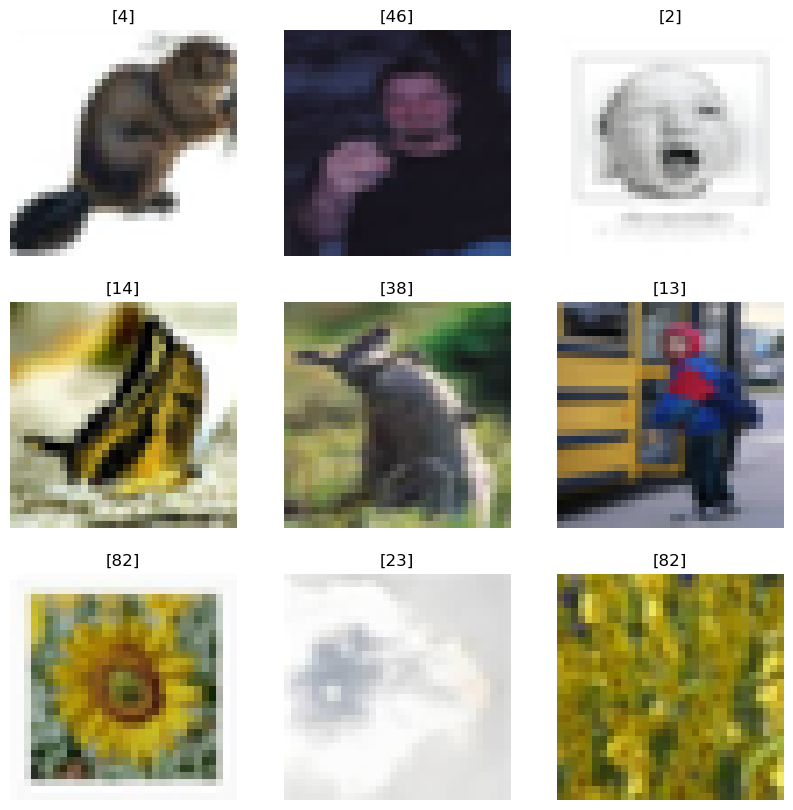

In [3]:
import matplotlib.pyplot as plt

# Show random images from the training set
plt.figure(figsize=(10, 10))
for i in range(9):
    idx = np.random.randint(0, x_test.shape[0])
    plt.subplot(3, 3, i+1)
    plt.grid(False)
    plt.imshow(x_train[idx])
    plt.title(y_train[idx])
    plt.axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize pixel values to be between 0 and 1
# Note to self: since in RGB each color will be represented as a variation
#               ranging from 0-255 then we will be dividing each pixel value 
#               in 255 to have it as a value between 0-1, other way to 
#               normalize it can be using std deviation but it'll produce a 
#               distribution between -1 and 1
x_train_normalized = x_train.astype('float32') / 255.0 # convert the array to floats and then divide it in 255
x_test_normalized  = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train_normalized = to_categorical(y_train, num_classes)
y_test_normalized = to_categorical(y_test, num_classes)

# Split the training set into training and validation sets (I like to give it new names so I can keep track of the entire process and the transformations applied)
x_train_v2, x_test_v2, y_train_v2, y_test_v2 = train_test_split(x_train_normalized, y_train_normalized, test_size=0.2, random_state=seed)

# Print shapes to confirm the split
print(f"Training set shape: {x_train_v2.shape}, Training labels shape: {y_train_v2.shape}")
print(f"Validation set shape: {x_test_v2.shape}, Validation labels shape: {y_test_v2.shape}")
print(f"Original test set shape: {x_test.shape}, Original test labels shape: {y_test.shape}")

Training set shape: (40000, 32, 32, 3), Training labels shape: (40000, 100)
Validation set shape: (10000, 32, 32, 3), Validation labels shape: (10000, 100)
Original test set shape: (10000, 32, 32, 3), Original test labels shape: (10000, 1)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential(name="Baseline_CNN")

# Convolutional layers
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=x_train[0].shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(Flatten())

# Dense (fully connected) layers
model.add(Dense(num_classes*2, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Resume of the model
model.summary()

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Baseline_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       409,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,148 (2.00 MB)

 Trainable params: 523,148 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [7]:
history = model.fit(x_train_v2, y_train_v2, epochs=15, batch_size=32, validation_data=(x_test_v2, y_test_v2), verbose=1)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.0515 - loss: 4.2521 - val_accuracy: 0.1859 - val_loss: 3.3759
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.1902 - loss: 3.3651 - val_accuracy: 0.2651 - val_loss: 2.9885
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.2570 - loss: 2.9905 - val_accuracy: 0.3105 - val_loss: 2.7481
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.3113 - loss: 2.7199 - val_accuracy: 0.3403 - val_loss: 2.5816
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.3498 - loss: 2.5192 - val_accuracy: 0.3602 - val_loss: 2.4983
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.3791 - loss: 2.3673 - val_accuracy: 0.3704 - val_loss: 2.4643
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.4091 - loss: 2.2300 - val_accuracy: 0.3801 - val_loss: 2.4087
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.4314 -

### Explanation 

I decided to use a number of epoch = 15 using experimental values used by running the training process a number of times and analyzing the performance of the model in each of those values as follows:

- Epoch number 50: Had to stop at the step 31 _accuracy: 0.9237 - loss: 0.2319 - val_accuracy: 0.3330 - val_loss: 7.5062_
- Epoch number 50 after removing one layer in the CNN steps: Model stopped at 22th iteration _accuracy: 0.9381 - loss: 0.1929 - val_accuracy: 0.3327 - val_loss: 7.0427_
- Epoch number 25 adding a Dropout of 30%: 
  - Iteration 1: Model stopped at 20th step _accuracy: 0.6631 - loss: 1.0979 - val_accuracy: 0.3801 - val_loss: 2.9442_

After analyzing the model I found that generally speaking after running 8-10 iterations the loss on the validation started increasing while the validation accuracy of the model didn't benefited in each step, while the accuracy of themodel started increasing (indicating a overfitting of the model), that's why I decided to left the epoch number at 15 so we gave enough iterations while avoiding overfitting.

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [8]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_normalized, y_test_normalized, verbose=1)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3937 - loss: 2.6150
Test Loss: 2.5705
Test Accuracy: 0.3958


In [111]:
from sklearn.metrics import f1_score

# Get predicted probabilities for the test set
y_pred_prob = model.predict(x_test_normalized)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_normalized, axis=1)

# Calculate recall
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Test F1-Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Test F1-Score: 0.3935


### Explanation

- <b>Accuracy:</b> The test accuracy 0.3927 => 39.27%
- <b>Other metric:</b> f1-score
- <b>Reason for selection:</b> 
  - F1-Score is used to get a balanced measure of precision and recall for each class 
  - $F1-Score = 2 * (Precision * Recall) / (Precision + Recall)$. 
  - Since CIFAR-100 is a multi-class problem, we will be using the macro averaged version which calculates the F1-score for each class independently and then averages them.
- <b>Value of metric:</b> F1-Score calculated against test is 0.3908
- <b>Interpretation of metric value:</b> The F1 score ranges from 0 to 1, with 1 being a perfect score. 0.3908: is closer to 0, suggesting there's room for improvement in the model's performance, this can be the result of a model which can predict well certain classes while others not so well.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

In [96]:
# Plot training & validation accuracy values
def history_plotting(history):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')  
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

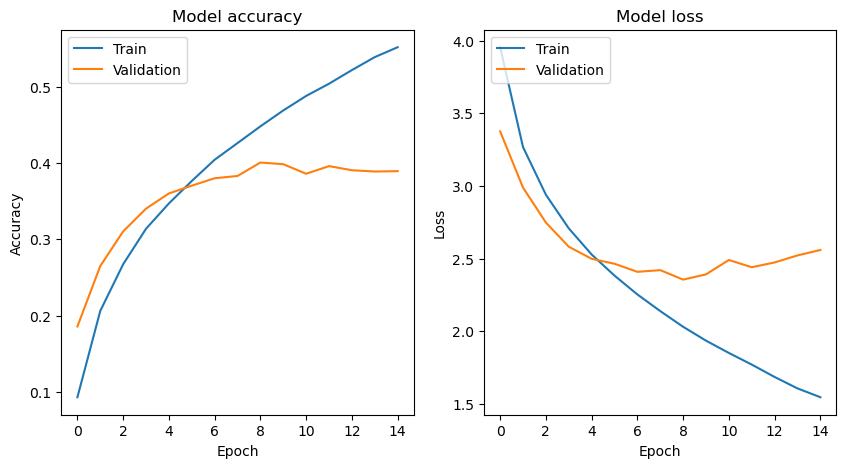

In [97]:
history_plotting(history=history)

In [104]:
def print_description_images(y_predicted, y_expected, dataset, prediction_proba, correct=True):
    if correct:
        indices =  np.where(y_predicted == y_expected)[0]
        case_label = 'Correctly'
    else:
        indices = np.where(y_predicted != y_expected)[0]
        case_label = 'Incorrectly'

    if indices.size > 0:
        idx = np.random.choice(indices)
        image = dataset[idx]
        plt.imshow(image)
        plt.title(f"{case_label} Classified - True Label: { y_true[idx] }, Predicted Label: { y_predicted[idx] }")
        plt.axis('off')
        plt.show()

    if prediction_proba is not None:
        print(f"Classification probabilities: \n {prediction_proba[idx]}")

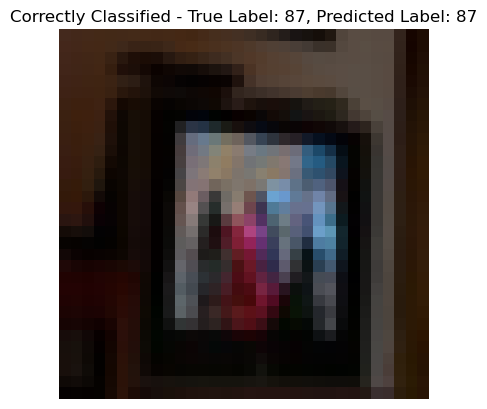

Classification probabilities: 
 [7.08278327e-04 2.72768521e-05 6.24841154e-02 5.08970930e-04
 9.94261654e-07 6.19315397e-05 4.56459202e-06 1.77522634e-05
 1.19545166e-05 5.44179813e-04 2.12683957e-02 2.68774033e-02
 7.19614982e-05 1.67366227e-06 9.71699337e-05 6.51386435e-05
 1.60074428e-01 6.04651333e-08 5.37613014e-05 1.77610855e-05
 3.10564428e-06 9.52458009e-03 7.96460658e-02 1.78390692e-07
 3.20696427e-06 2.29583511e-05 3.44252476e-05 1.36308699e-06
 2.53817975e-03 3.04349214e-07 1.97404205e-07 4.22228027e-07
 1.03026810e-04 7.48251125e-07 1.47696948e-04 5.52572981e-02
 6.62100647e-05 6.60987134e-05 1.13294218e-05 3.42607177e-06
 1.02077154e-02 9.34815887e-08 8.98842518e-06 2.34403982e-04
 2.12305549e-05 1.11338115e-04 8.54262561e-02 2.45982956e-11
 5.77045757e-05 1.82694179e-10 8.69696742e-05 4.11324349e-04
 2.13691044e-13 2.20716515e-07 1.82428005e-06 3.56173579e-04
 2.46878251e-08 2.72849167e-04 6.39441389e-09 2.36612067e-07
 7.92347077e-10 3.06587815e-02 3.70540183e-05 9.70790

In [105]:
print_description_images(y_predicted=y_pred, 
                         y_expected=y_true, 
                         dataset=x_test_normalized,
                         prediction_proba=y_pred_prob)

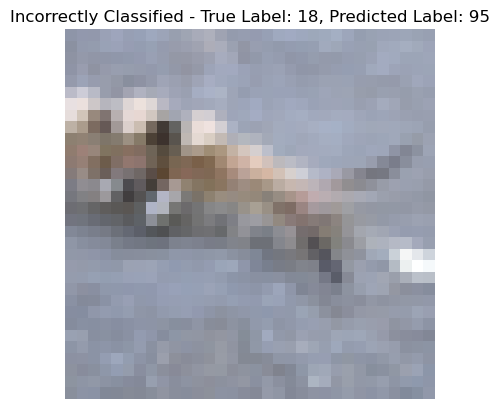

Classification probabilities: 
 [1.24324444e-07 3.67248955e-04 1.56894966e-04 2.05211691e-03
 1.02718978e-03 4.53039756e-05 4.60587238e-04 1.04854314e-03
 2.49490258e-03 1.25626990e-04 8.20135028e-06 1.11876281e-04
 6.46261424e-02 1.37475072e-04 2.57034873e-04 3.32815852e-03
 4.97055589e-05 6.13521843e-05 8.48004408e-03 1.33039849e-03
 5.73264224e-05 3.48513845e-06 7.03670012e-05 2.32582097e-03
 1.03709899e-04 9.14804259e-05 4.14562738e-03 1.14480428e-01
 2.20368584e-05 1.14229498e-02 6.94147199e-02 1.10891124e-04
 2.15908024e-03 8.60529486e-03 4.99563117e-04 1.33126778e-05
 2.34664822e-05 4.68147965e-03 2.52312887e-03 3.94241931e-03
 3.07334158e-05 7.11220491e-06 3.73420445e-03 1.05811887e-05
 7.13948011e-02 1.45253660e-02 8.56833940e-05 7.13344998e-05
 1.03224273e-04 6.00982050e-04 4.19064844e-03 1.38342904e-04
 9.96437520e-05 2.57745580e-09 3.61437706e-05 1.05283231e-01
 1.49869155e-02 1.17736272e-04 7.81762355e-06 1.18960929e-03
 6.38687416e-05 3.56873386e-07 1.48454376e-06 1.00236

In [106]:
print_description_images(y_predicted=y_pred, 
                         y_expected=y_true,
                         dataset=x_test_normalized, 
                         prediction_proba=y_pred_prob, 
                         correct=False)

### Results discussion 

- The accuracy plot shows how the model's accuracy changed on the training and validation sets over each iteration (epochs).  
- In this case we can see signs of overfitting since the training accuracy is much higher than validation accuracy.

- The loss plot shows how confident the model is with tis predictions, whenever the loss value tends to zero it means a better prediction, confirming what we saw in the accuracy plot, the loss shows a local minimum and then it starts growing reflecting worse predictions on the validation data.

- It is indeed consistent with what we saw in the training steps of the assignment.

- The plots of the correctly and incorrectly classified images helps us to identify visually some examples about the model's performance

- The probabilities show the model's confidence in its prediction for each class (as it was trying to fit each image with all the different available classes). The predicted class will be the higher between them all.
  -  For correctly classified images, the probability for the true class is usually higher than the others. 
  -  For incorrectly classified images, the model is less confident and may show slighly higher probability values for the predicted class and closer values for some other classes.
  -  For this particular case the correctly predicted image has a probability of 0.62314576 for the predicted class (34) and 0.13373543 for the next most probable class (88) which is less than half of the probability. 
  -  However, the incorrectly predicted image predicted the class 4 with a probability of 0.21915834 and the next most probable class 55 with 0.16434763.
  -  As we can see the difference is noticeable at first sight, where the correctly predicted image has a difference of more than 50% between the top 2 classes whereas the incorrectly predicted image has a difference of around 25%

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [49]:
## NOTE: This code is not used, but I leave it since it was part of the process of improving the model
from keras.layers import RandomFlip, RandomRotation, RandomZoom

# Create a data augmentation model
data_augmentation_layers = [
    RandomFlip('horizontal'),   # Flip the image randomly in horizontal direction
    RandomRotation(0.2),        # Rotate the image by up to 20%
    RandomZoom(0.2),            # Zoom into the image again up to 20%
]

# Now in order to not put that into the model
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images


x_train_v2_augmented = np.array(list(map(data_augmentation, x_train_v2)))

In [90]:
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from keras.regularizers import l2

# Define the new model
model_improved = Sequential(name="Improved_CNN")

# Convolutional layers
model_improved.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train[0].shape))
model_improved.add(MaxPooling2D((2, 2)))
model_improved.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_improved.add(MaxPooling2D((2, 2)))
model_improved.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_improved.add(MaxPooling2D((2, 2)))
model_improved.add(BatchNormalization())
model_improved.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_improved.add(BatchNormalization())
model_improved.add(MaxPooling2D((2, 2)))

# # Global Average Pooling layer (replaces flattening)
model_improved.add(GlobalAveragePooling2D())

# Dense layers
model_improved.add(Dense(num_classes*2, activation='relu', kernel_regularizer=l2(1e-4)))
model_improved.add(Dropout(0.5))  # Higher dropout after dense layers

# Output layer
model_improved.add(Dense(num_classes, activation='softmax'))

model_improved.summary()

Model: "Improved_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 200)            │        51,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 100)            │        20,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,452 (1.76 MB)

 Trainable params: 460,684 (1.76 MB)

 Non-trainable params: 768 (3.00 KB)

In [91]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define Adam Optimizer
adam_optimizer = Adam(learning_rate=0.0005, 
                      weight_decay=1e-4)

# Create a learning_rate scheduler to change the learning rate in the event of falling into a plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', # What are we keeping an eye on
                                patience=5,          # how often?
                                restore_best_weights=True)

early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10, 
                               restore_best_weights=True)


In [92]:
# Compile the model with Adam optimizer and learning rate decay
model_improved.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [93]:
# Train the model with data augmentation
history_improved = model_improved.fit(
    x_train_v2, y_train_v2,
    epochs=50,  # Increased epochs to allow model to learn from the improved model
    validation_data=(x_test_v2, y_test_v2),
    callbacks=[lr_scheduler, early_stopping], # Adding early stopping mechanisms and fine tunning of LR
    verbose=1
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.0506 - loss: 4.4065 - val_accuracy: 0.1355 - val_loss: 3.6840 - learning_rate: 5.0000e-04
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.1516 - loss: 3.6081 - val_accuracy: 0.1734 - val_loss: 3.4859 - learning_rate: 5.0000e-04
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.2158 - loss: 3.2057 - val_accuracy: 0.2792 - val_loss: 2.8949 - learning_rate: 5.0000e-04
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.2641 - loss: 2.9168 - val_accuracy: 0.2566 - val_loss: 3.0139 - learning_rate: 5.0000e-04
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.3139 - loss: 2.6730 - val_accuracy: 0.3594 - val_loss: 2.4875 - learning_rate: 5.0000e-04
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.3510 - loss: 2.4995 - val_accuracy: 0.2968 - val_loss: 2.9399 - learning_rate: 5.0000e-04
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━

In [94]:
# Evaluate the augmented model
loss_augmented, accuracy_augmented = model_improved.evaluate(x_test_normalized, y_test_normalized, verbose=1)

print(f"Test Loss (Data Augmented): {loss_augmented:.4f}")
print(f"Test Accuracy (Data Augmented): {accuracy_augmented:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4717 - loss: 2.2188
Test Loss (Data Augmented): 2.2219
Test Accuracy (Data Augmented): 0.4690


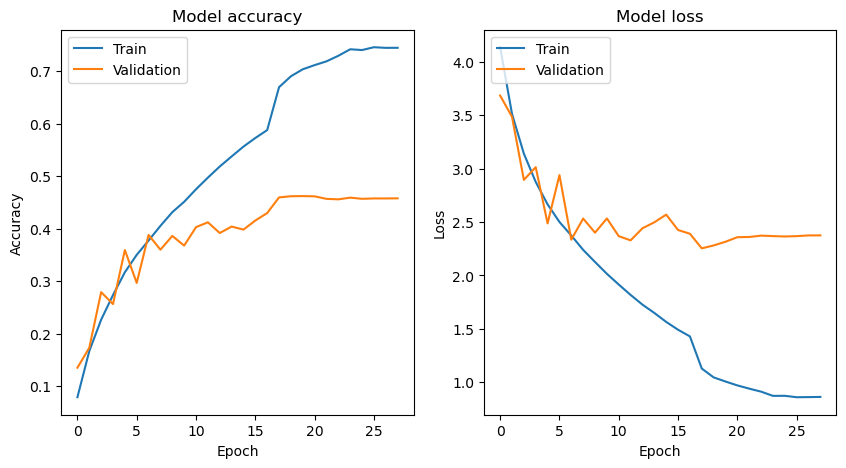

In [98]:
history_plotting(history=history_improved)

In [112]:
# Get predicted probabilities for the test set
y_pred_prob_improved = model_improved.predict(x_test_normalized)

# Convert probabilities to class labels
y_pred_improved = np.argmax(y_pred_prob_improved, axis=1)

# Calculate recall
f1_improved = f1_score(y_true, y_pred_improved, average='macro')

print(f"Test F1-Score: {f1_improved:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Test F1-Score: 0.4674


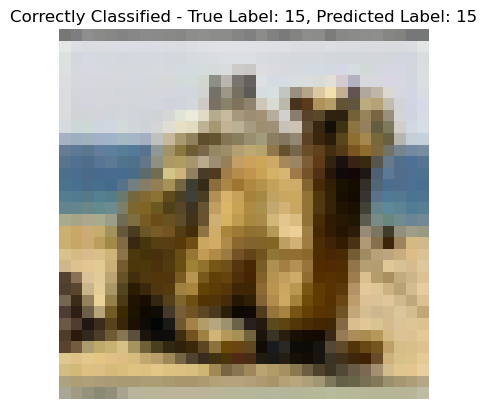

Classification probabilities: 
 [1.14927711e-11 6.81793011e-10 1.31416593e-08 5.80683663e-05
 5.88855255e-05 3.70668470e-12 2.90117646e-06 4.37282086e-11
 5.82308743e-08 4.20745272e-10 7.80395054e-11 1.73204118e-08
 3.47036444e-09 1.23916089e-09 1.21544080e-10 9.69733953e-01
 1.80551906e-12 1.55857397e-05 7.07629955e-10 2.20371038e-03
 6.19802907e-12 1.17825000e-10 3.44331674e-10 1.69762574e-13
 4.78681764e-12 6.63525856e-09 1.37559471e-06 5.85915103e-08
 8.31984655e-12 2.10593604e-02 7.93157044e-13 5.95980906e-04
 4.79253913e-07 3.39844952e-08 7.59154907e-04 1.70085599e-07
 2.87882722e-06 1.33967304e-04 2.32559536e-03 1.85491162e-12
 9.38967792e-10 2.08295950e-10 9.10235030e-06 2.00851914e-03
 2.06190194e-07 1.07584725e-07 2.74724457e-08 1.44382186e-08
 5.40619199e-12 3.51412267e-11 3.69890415e-07 2.19309345e-06
 6.88693333e-08 1.84378138e-10 4.73413442e-09 1.97317804e-05
 3.85131898e-06 9.83420978e-06 9.73737965e-11 1.75723980e-09
 5.55056760e-13 1.31203696e-12 2.48829989e-15 1.53832

In [120]:
print_description_images(y_predicted=y_pred_improved, 
                         y_expected=y_true, 
                         dataset=x_test_normalized, 
                         prediction_proba=y_pred_prob_improved, 
                         correct=True)

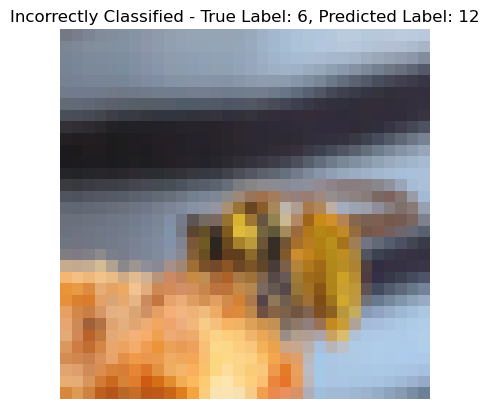

Classification probabilities: 
 [1.23571439e-07 7.70995510e-04 6.91586683e-05 1.26266247e-03
 2.28512188e-04 7.41578313e-03 1.46126149e-06 5.58631928e-06
 1.28091022e-04 5.48349740e-03 4.64751676e-04 3.58029210e-05
 2.46766463e-01 4.41803187e-02 3.69880800e-05 2.45355070e-04
 9.68939345e-03 6.91393483e-03 2.63650157e-02 4.92345449e-03
 3.05484318e-05 1.45626984e-06 2.01971168e-04 2.91618216e-03
 1.18249795e-06 6.45030383e-03 2.48335200e-05 1.01389093e-02
 1.49848944e-04 1.63661403e-04 6.98188087e-04 1.56859678e-04
 3.19924438e-05 1.32617624e-02 1.36094503e-04 5.22514638e-05
 3.23900650e-07 4.02746648e-02 1.21363053e-04 1.43539102e-03
 3.46069806e-03 2.87189643e-04 5.41889167e-05 1.71816641e-08
 5.43834781e-03 6.07670110e-04 6.21897198e-05 1.01457090e-05
 9.89814907e-06 1.33159815e-03 1.35985138e-05 2.67114374e-04
 9.66767857e-06 1.11209573e-07 3.74032061e-05 1.04808696e-02
 1.37079658e-03 1.38476054e-04 4.16034367e-03 1.67435010e-05
 4.27861549e-02 4.31652188e-06 2.61204013e-06 5.40479

In [124]:
print_description_images(y_predicted=y_pred_improved, 
                         y_expected=y_true, 
                         dataset=x_test_normalized, 
                         prediction_proba=y_pred_prob_improved, 
                         correct=False)

In [138]:
import pandas as pd

original_model = {'accuracy': accuracy, 'categorical_crossentropy': loss, 'f1-macro_score': f1}
improved_model = {'accuracy': accuracy_augmented, 'categorical_crossentropy': loss_augmented, 'f1-macro_score': f1_improved}

comparison = {
    key_metric: 100 * (improved_model[key_metric] - original_model[key_metric]) / original_model[key_metric]
    for key_metric in original_model
}


metric: accuracy - OG[metric]: 0.4690000116825104
metric: categorical_crossentropy - OG[metric]: 2.221877336502075
metric: f1-macro_score - OG[metric]: 0.4674301244888224


In [139]:
import pandas as pd

original_model = {'accuracy': accuracy, 'categorical_crossentropy': loss, 'f1-macro_score': f1}
improved_model = {'accuracy': accuracy_augmented, 'categorical_crossentropy': loss_augmented, 'f1-macro_score': f1_improved}

comparison = {
    key_metric: 100 * (improved_model[key_metric] - original_model[key_metric]) / original_model[key_metric]
    for key_metric in original_model
}

# Create a DataFrame
metrics_data = {
    "Metric": list(comparison.keys()),
    "Original Model": list(original_model.values()),
    "Improved Model": list(improved_model.values()),
    "Difference (%)": list(comparison.values()),
}

df_metrics = pd.DataFrame(metrics_data).round(decimals=2)

# Display the DataFrame
df_metrics

,Metric,Original Model,Improved Model,Difference (%)
0,accuracy,0.40,0.47,18.49
1,categorical_crossentropy,2.57,2.22,-13.56
2,f1-macro_score,0.39,0.47,18.78


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

### Results discussion

For this model in particular I tried to apply several strategies for the improved version of it, starting by doing some data augmentation which proved to be too aggresive for my neural network architecture and that ended up un damaging it's accuracy and increasing the loss, after working with the hyper-parameters and the architecture itself I could notice an improvement between the revised version of the model and the original version, however the final output is not as good as I would expected with a final accuracy of 47% (a significant improvement) I think the biggest players in that improvement are the variable learning rate and the improved architecture. 

Due to the lower accuracy there is a lot of room to improve in order to reach a more confident model which serves better its objective. To reach that improvement I would work around the data augmentation and even some data generation so the model can learn better generalizations for each class, I would also test some pre-trained models so I can leverage that work for my architecture a little bit _"easier"_.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.